# EMA Scalping Strategy

In [1]:
#import data from yahoo finance (it can only go back two months)
import pandas as pd
import yfinance as yf
import pandas_ta as ta

df = yf.download(tickers = 'BTC-USD', start ="2022-08-15", end = "2022-10-7", interval ='15m')
df.head()



ModuleNotFoundError: No module named 'yfinance'

In [5]:
df=df[df['Volume']!=0]
df.isna().sum()
#df.reset_index(drop=True, inplace=True)
df.reset_index(inplace=True)
#df= df.astype(float)
df.tail()

Datetime          Open          High           Low  \
3474 2022-09-25 03:00:00+00:00  18954.574219  18979.701172  18946.724609   
3475 2022-09-25 03:15:00+00:00  18980.886719  19022.964844  18980.195312   
3476 2022-09-25 03:30:00+00:00  19018.773438  19029.095703  19018.773438   
3477 2022-09-25 05:30:00+00:00  18962.343750  18990.621094  18961.710938   
3478 2022-09-25 06:15:00+00:00  19006.208984  19045.345703  19006.208984   

             Close     Adj Close    Volume  
3474  18979.701172  18979.701172  37005312  
3475  19018.869141  19018.869141  82649088  
3476  19029.095703  19029.095703  11053056  
3477  18990.621094  18990.621094  16171008  
3478  19041.537109  19041.537109   7813120

In [6]:
#add the 50 day, 100 day, and 150 day moving average
import pandas_ta as ta
df["EMA50"] = ta.ema(df.Close, length=50)
df["EMA100"] = ta.ema(df.Close, length=150)
df["EMA150"] = ta.ema(df.Close, length=300)

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [7]:
backrollingN = 10  # number of periods of the ema that the slope calculation takes into account
df['slopeEMA50'] = df['EMA50'].diff(periods=1)
df['slopeEMA50'] = df['slopeEMA50'].rolling(window=backrollingN).mean()

df['slopeEMA100'] = df['EMA100'].diff(periods=1)
df['slopeEMA100'] = df['slopeEMA100'].rolling(window=backrollingN).mean()

df['slopeEMA150'] = df['EMA150'].diff(periods=1)
df['slopeEMA150'] = df['slopeEMA150'].rolling(window=backrollingN).mean()

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

## EMA Signal

In [9]:
#build logic for when we are in an uptrend or a downtrend - based on alignment and ordering of the EMAs
import numpy as np
conditions = [
    ( (df['EMA50']<df['EMA100']) & (df['EMA100']<df['EMA150']) & (df['slopeEMA50']<0) & (df['slopeEMA100']<0) & (df['slopeEMA150']<0) ),   #downtrend =1
    ( (df['EMA50']>df['EMA100']) & (df['EMA100']>df['EMA150']) & (df['slopeEMA50']>0) & (df['slopeEMA100']>0) & (df['slopeEMA150']>0) )    #uptrend = 2
           ]
choices = [1, 2]
df['EMAsignal'] = np.select(conditions, choices, default=0)

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
df.tail()

Datetime          Open          High           Low  \
3474 2022-09-25 03:00:00+00:00  18954.574219  18979.701172  18946.724609   
3475 2022-09-25 03:15:00+00:00  18980.886719  19022.964844  18980.195312   
3476 2022-09-25 03:30:00+00:00  19018.773438  19029.095703  19018.773438   
3477 2022-09-25 05:30:00+00:00  18962.343750  18990.621094  18961.710938   
3478 2022-09-25 06:15:00+00:00  19006.208984  19045.345703  19006.208984   

             Close     Adj Close    Volume         EMA50        EMA100  \
3474  18979.701172  18979.701172  37005312  19037.828071  19032.011981   
3475  19018.869141  19018.869141  82649088  19037.084584  19031.837903   
3476  19029.095703  19029.095703  11053056  19036.771294  19031.801583   
3477  18990.621094  18990.621094  16171008  19034.961483  19031.256146   
3478  19041.537109  19041.537109   7813120  19035.219350  19031.392318   

            EMA150  slopeEMA50  slopeEMA100  slopeEMA150  EMAsignal  
3474  19100.407927   -3.563568    -0.932487    -0.919806          0  
3475  19099.866141   -3.886604    -1.076440    -0.992107          0  
3476  19099.395906   -3.396313    -0.948066    -0.928266          0  
3477  19098.673149   -3.257939    -0.933758    -0.921220          0  
3478  19098.293508   -2.587529    -0.738112    -0.823155          0

## Total signal

In [11]:
#this is our long or short signal logic
TotSignal = [0] * len(df)
for row in range(0, len(df)):
    TotSignal[row] = 0
    if df.EMAsignal[row]==1 and df.Open[row]>df.EMA50[row] and df.Close[row]<df.EMA50[row]:
        TotSignal[row]=1 #signal to short the ticker
    if df.EMAsignal[row]==2 and df.Open[row]<df.EMA50[row] and df.Close[row]>df.EMA50[row]:
        TotSignal[row]=2 #signal to long the ticker

df['TotSignal']=TotSignal

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [26]:
df.head(10)

Datetime          Open          High           Low  \
0  2022-08-09 19:00:00+00:00  23073.201172  23073.201172  23052.652344   
1  2022-08-09 19:45:00+00:00  23063.556641  23088.173828  23058.123047   
2  2022-08-09 20:00:00+00:00  23070.353516  23101.931641  23070.353516   
3  2022-08-09 20:15:00+00:00  23093.912109  23109.470703  23079.771484   
4  2022-08-09 20:30:00+00:00  23109.779297  23139.912109  23109.779297   
..                       ...           ...           ...           ...   
95 2022-08-10 22:45:00+00:00  23900.828125  23900.828125  23857.613281   
96 2022-08-10 23:00:00+00:00  23864.185547  23897.923828  23857.970703   
97 2022-08-10 23:15:00+00:00  23911.500000  23915.218750  23903.136719   
98 2022-08-10 23:30:00+00:00  23896.695312  23921.158203  23896.695312   
99 2022-08-10 23:45:00+00:00  23914.851562  23946.015625  23909.582031   

           Close     Adj Close    Volume         EMA50        EMA100  \
0   23052.652344  23052.652344   4739072  23357.979136  23533.435045   
1   23065.164062  23065.164062  30474240  23346.496192  23527.232781   
2   23098.417969  23098.417969  11884544  23336.767634  23521.553114   
3   23105.843750  23105.843750  45824000  23327.711795  23516.047030   
4   23139.912109  23139.912109  42129408  23320.347102  23511.065111   
..           ...           ...       ...           ...           ...   
95  23859.189453  23859.189453  46047232  23705.276369  23521.681343   
96  23897.250000  23897.250000  48355328  23712.804746  23526.655763   
97  23906.816406  23906.816406  55404544  23720.413047  23531.691003   
98  23917.154297  23917.154297  24561664  23728.128390  23536.796477   
99  23946.015625  23946.015625  35393536  23736.672987  23542.216598   

          EMA150  slopeEMA50  slopeEMA100  slopeEMA150  EMAsignal  TotSignal  \
0   23395.678516  -14.014001    -6.547592    -2.212738          0          0   
1   23393.482407  -13.523256    -6.480736    -2.208002          0          0   
2   23391.521846  -13.027016    -6.406410    -2.199106          0          0   
3   23389.623652  -12.488594    -6.312249    -2.179824          0          0   
4   23387.964439  -11.954705    -6.213735    -2.157862          0          0   
..           ...         ...          ...          ...        ...        ...   
95  23422.949023    9.433641     5.315249     3.244646          2          0   
96  23426.100524    9.710363     5.463260     3.332655          2          0   
97  23429.294650    9.683708     5.510510     3.370515          2          0   
98  23432.536242    9.638950     5.550667     3.404880          2          0   
99  23435.948065    9.161021     5.443397     3.365324          2          0   

    pointpos  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
..       ...  
95       NaN  
96       NaN  
97       NaN  
98       NaN  
99       NaN  

[100 rows x 16 columns]

In [13]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Datetime          Open          High           Low  \
0 2022-08-09 19:00:00+00:00  23073.201172  23073.201172  23052.652344   
1 2022-08-09 19:45:00+00:00  23063.556641  23088.173828  23058.123047   
2 2022-08-09 20:00:00+00:00  23070.353516  23101.931641  23070.353516   
3 2022-08-09 20:15:00+00:00  23093.912109  23109.470703  23079.771484   
4 2022-08-09 20:30:00+00:00  23109.779297  23139.912109  23109.779297   

          Close     Adj Close    Volume         EMA50        EMA100  \
0  23052.652344  23052.652344   4739072  23357.979136  23533.435045   
1  23065.164062  23065.164062  30474240  23346.496192  23527.232781   
2  23098.417969  23098.417969  11884544  23336.767634  23521.553114   
3  23105.843750  23105.843750  45824000  23327.711795  23516.047030   
4  23139.912109  23139.912109  42129408  23320.347102  23511.065111   

         EMA150  slopeEMA50  slopeEMA100  slopeEMA150  EMAsignal  TotSignal  
0  23395.678516  -14.014001    -6.547592    -2.212738          0          0  
1  23393.482407  -13.523256    -6.480736    -2.208002          0          0  
2  23391.521846  -13.027016    -6.406410    -2.199106          0          0  
3  23389.623652  -12.488594    -6.312249    -2.179824          0          0  
4  23387.964439  -11.954705    -6.213735    -2.157862          0          0

In [14]:
df["TotSignal"].value_counts()

0    3132
1      25
2      13
Name: TotSignal, dtype: int64

## Visualizing signals on chart

In [15]:
def pointpos(x):
    if x['TotSignal']==1:
        return x['High']+1e-3
    elif x['TotSignal']==2:
        return x['Low']-1e-3
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


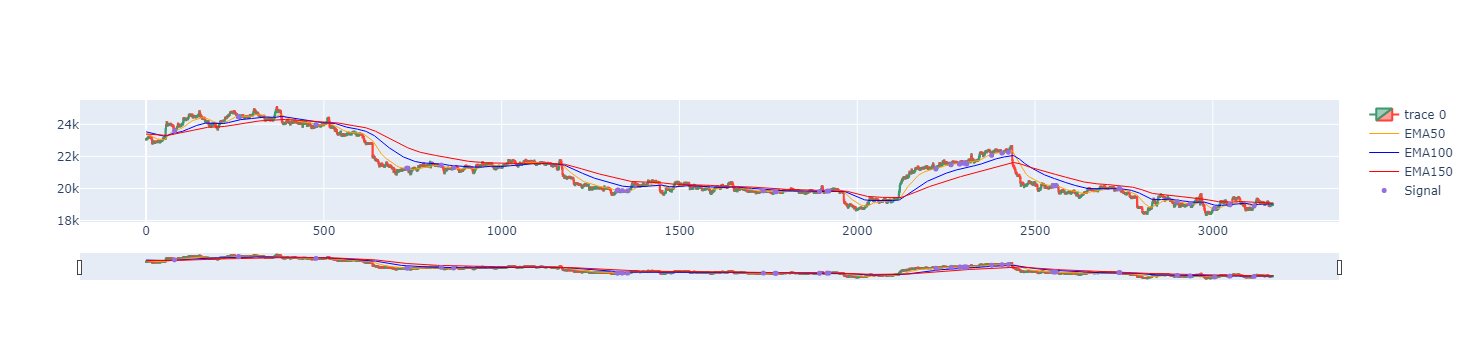

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
dfpl = df[:]
#100:350
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close']),
                go.Scatter(x=dfpl.index, y=dfpl.EMA50, line=dict(color='orange', width=1), name="EMA50"),
                go.Scatter(x=dfpl.index, y=dfpl.EMA100, line=dict(color='blue', width=1), name="EMA100"),
                go.Scatter(x=dfpl.index, y=dfpl.EMA150, line=dict(color='red', width=1), name="EMA150")])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="Signal")
fig.show()

In [17]:
dfpl

Datetime          Open          High           Low  \
0    2022-08-09 19:00:00+00:00  23073.201172  23073.201172  23052.652344   
1    2022-08-09 19:45:00+00:00  23063.556641  23088.173828  23058.123047   
2    2022-08-09 20:00:00+00:00  23070.353516  23101.931641  23070.353516   
3    2022-08-09 20:15:00+00:00  23093.912109  23109.470703  23079.771484   
4    2022-08-09 20:30:00+00:00  23109.779297  23139.912109  23109.779297   
...                        ...           ...           ...           ...   
3165 2022-09-25 03:00:00+00:00  18954.574219  18979.701172  18946.724609   
3166 2022-09-25 03:15:00+00:00  18980.886719  19022.964844  18980.195312   
3167 2022-09-25 03:30:00+00:00  19018.773438  19029.095703  19018.773438   
3168 2022-09-25 05:30:00+00:00  18962.343750  18990.621094  18961.710938   
3169 2022-09-25 06:15:00+00:00  19006.208984  19045.345703  19006.208984   

             Close     Adj Close    Volume         EMA50        EMA100  \
0     23052.652344  23052.652344   4739072  23357.979136  23533.435045   
1     23065.164062  23065.164062  30474240  23346.496192  23527.232781   
2     23098.417969  23098.417969  11884544  23336.767634  23521.553114   
3     23105.843750  23105.843750  45824000  23327.711795  23516.047030   
4     23139.912109  23139.912109  42129408  23320.347102  23511.065111   
...            ...           ...       ...           ...           ...   
3165  18979.701172  18979.701172  37005312  19037.828071  19032.011981   
3166  19018.869141  19018.869141  82649088  19037.084584  19031.837903   
3167  19029.095703  19029.095703  11053056  19036.771294  19031.801583   
3168  18990.621094  18990.621094  16171008  19034.961483  19031.256146   
3169  19041.537109  19041.537109   7813120  19035.219350  19031.392318   

            EMA150  slopeEMA50  slopeEMA100  slopeEMA150  EMAsignal  \
0     23395.678516  -14.014001    -6.547592    -2.212738          0   
1     23393.482407  -13.523256    -6.480736    -2.208002          0   
2     23391.521846  -13.027016    -6.406410    -2.199106          0   
3     23389.623652  -12.488594    -6.312249    -2.179824          0   
4     23387.964439  -11.954705    -6.213735    -2.157862          0   
...            ...         ...          ...          ...        ...   
3165  19100.407927   -3.563568    -0.932487    -0.919806          0   
3166  19099.866141   -3.886604    -1.076440    -0.992107          0   
3167  19099.395906   -3.396313    -0.948066    -0.928266          0   
3168  19098.673149   -3.257939    -0.933758    -0.921220          0   
3169  19098.293508   -2.587529    -0.738112    -0.823155          0   

      TotSignal  pointpos  
0             0       NaN  
1             0       NaN  
2             0       NaN  
3             0       NaN  
4             0       NaN  
...         ...       ...  
3165          0       NaN  
3166          0       NaN  
3167          0       NaN  
3168          0       NaN  
3169          0       NaN  

[3170 rows x 16 columns]

In [18]:
dfpl.TotSignal.value_counts()

0    3132
1      25
2      13
Name: TotSignal, dtype: int64

## Backtesting Strategy

In [19]:
def SIGNAL():
    return dfpl.TotSignal

In [22]:

from backtesting import Strategy
class MyStrat(Strategy):
    initsize = 0.05 #initsize is how much of our portfolio amount will be trade with each time
    mysize = initsize
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()

        #this is logic for martingale
        # if(self.signal1>0 and len(self.trades)==0 and len(self.closed_trades)>0 and self.closed_trades[-1].pl < 0):
        #     self.mysize=self.mysize*2
        # elif len(self.closed_trades)>0 and self.closed_trades[-1].pl > 0:
        #     self.mysize=self.initsize

        #logic for long signal: we set our take profit to double our stop loss
        if self.signal1==2 and len(self.trades)==0:   
            sl1 = self.data.Close[-1] - 200000e-4
            tp1 = self.data.Close[-1] + 400000e-4
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
        #logic for short signal: we set our take profit to double our stop loss
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + 200000e-4
            tp1 = self.data.Close[-1] - 400000e-4
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

In [23]:
from backtesting import Backtest
#intial cash is 1000000000, based on 0% commission
bt = Backtest(dfpl, MyStrat, cash=1000000000, margin=1/2, commission=.0000)
stat = bt.run()
stat

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    3169.0
Duration                               3169.0
Exposure Time [%]                     2.14511
Equity Final [$]               1006568886.875
Equity Peak [$]             1006804976.146484
Return [%]                           0.656889
Buy & Hold Return [%]              -17.399799
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                    -0.13893
Avg. Drawdown [%]                   -0.035417
Max. Drawdown Duration                  499.0
Avg. Drawdown Duration             134.333333
# Trades                                 36.0
Win Rate [%]                        44.444444
Best Trade [%]                       0.244126
Worst Trade [%]                     -0.305027
Avg. Trade [%]                    

In [24]:
bt.plot()

Row(id='1456', ...)